# Assignment 3

## Julia Szczepaniak 4 h
## Binsha Nazar Othupalliparambu Nazar 10 h

### Task 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import sklearn.cluster as cluster
from scipy.spatial.distance import cdist
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs

CMAP = 'viridis'

In [2]:
df = pd.read_csv('data_assignment3.csv') # Read data frame
df

,residue name,position,chain,phi,psi
0,LYS,10,A,-149.312855,142.657714
1,PRO,11,A,-44.283210,136.002076
2,LYS,12,A,-119.972621,-168.705263
3,LEU,13,A,-135.317212,137.143523
4,LEU,14,A,-104.851467,95.928520
...,...,...,...,...,...
29364,GLY,374,B,-147.749557,155.223562
29365,GLN,375,B,-117.428541,133.019506
29366,ILE,376,B,-113.586448,112.091970
29367,ASN,377,B,-100.668779,-12.102821


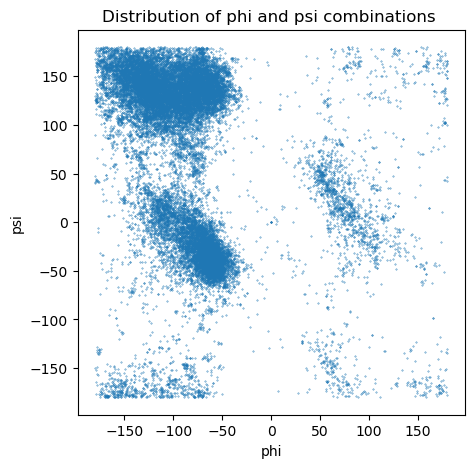

In [3]:
x = df.phi
y = df.psi
plt.figure(figsize=(5, 5))
plt.title('Distribution of phi and psi combinations ')
plt.xlabel('phi')
plt.ylabel('psi')
plt.scatter(x,y, s=0.1)

(array([[ 9.,  4.,  1., ..., 31., 23., 19.],
        [26.,  8.,  2., ..., 53., 31., 38.],
        [20., 15.,  8., ..., 67., 49., 36.],
        ...,
        [ 2.,  2.,  5., ...,  9.,  2.,  2.],
        [ 6.,  8.,  1., ...,  4.,  6.,  1.],
        [ 7.,  5.,  2., ...,  9.,  4.,  2.]]),
 array([-1.79991175e+02, -1.72791874e+02, -1.65592574e+02, -1.58393273e+02,
        -1.51193973e+02, -1.43994672e+02, -1.36795371e+02, -1.29596071e+02,
        -1.22396770e+02, -1.15197469e+02, -1.07998169e+02, -1.00798868e+02,
        -9.35995676e+01, -8.64002669e+01, -7.92009663e+01, -7.20016657e+01,
        -6.48023651e+01, -5.76030645e+01, -5.04037638e+01, -4.32044632e+01,
        -3.60051626e+01, -2.88058620e+01, -2.16065614e+01, -1.44072607e+01,
        -7.20796012e+00, -8.65950000e-03,  7.19064112e+00,  1.43899417e+01,
         2.15892424e+01,  2.87885430e+01,  3.59878436e+01,  4.31871442e+01,
         5.03864448e+01,  5.75857455e+01,  6.47850461e+01,  7.19843467e+01,
         7.91836473e+01,  8.638

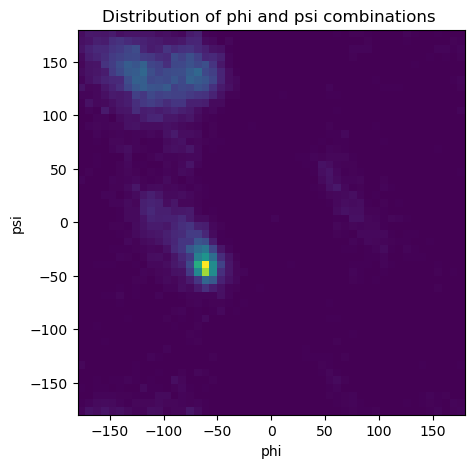

In [4]:
plt.figure(figsize=(5, 5))
plt.title('Distribution of phi and psi combinations ')
plt.xlabel('phi')
plt.ylabel('psi')
plt.hist2d(x, y, bins=50)

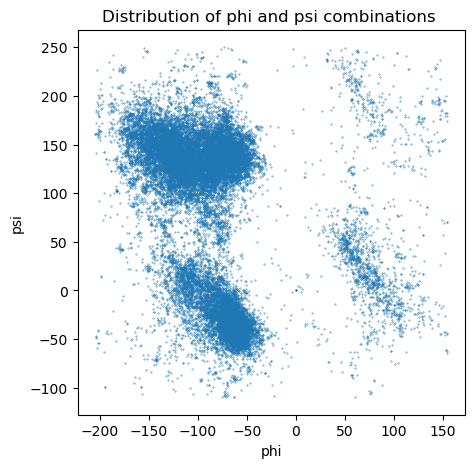

In [5]:
mask1 = df.psi<-110
mask2 = df.phi>155
df.loc[mask1,'psi']=df.loc[mask1,'psi']+360
df.loc[mask2,'phi']=df.loc[mask2,'phi']-360
x = df.phi
y = df.psi
plt.figure(figsize=(5, 5))
plt.title('Distribution of phi and psi combinations ')
plt.xlabel('phi')
plt.ylabel('psi')
plt.scatter(x,y,s=0.1)

### Task 2

In [6]:
# Perform K-Means clustering. Specify the number of clusters (2,3,4,5) and fit the data X
X=df[['phi','psi']]
km2 = KMeans(n_clusters=2, random_state=0).fit(X)
km3 = KMeans(n_clusters=3, random_state=0).fit(X)
km4 = KMeans(n_clusters=4, random_state=0).fit(X)
km5 = KMeans(n_clusters=5, random_state=0).fit(X)

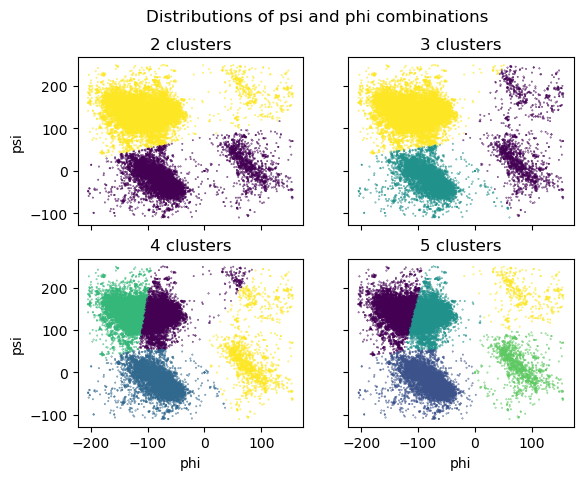

In [7]:
# Make scatter subplots for 2,3,4,5 clusters and set the title
fig, axs = plt.subplots(2, 2)
fig.suptitle('Distributions of psi and phi combinations')

df['clusters'] = km2.labels_
axs[0, 0].scatter(x, y, s=0.1, c = df.clusters)
axs[0, 0].set_title('2 clusters')

df['clusters'] = km3.labels_
axs[0, 1].scatter(x, y, s=0.1, c = df.clusters)
axs[0, 1].set_title('3 clusters')

df['clusters'] = km4.labels_
axs[1, 0].scatter(x, y, s=0.1, c = df.clusters)
axs[1, 0].set_title('4 clusters')

df['clusters'] = km5.labels_
axs[1, 1].scatter(x, y, s=0.1, c = df.clusters)
axs[1, 1].set_title('5 clusters')

# Make labels
for ax in axs.flat:
    ax.set(xlabel='phi', ylabel='psi')
    
# Hide some labels
for ax in axs.flat:
    ax.label_outer()

#### The elbow method

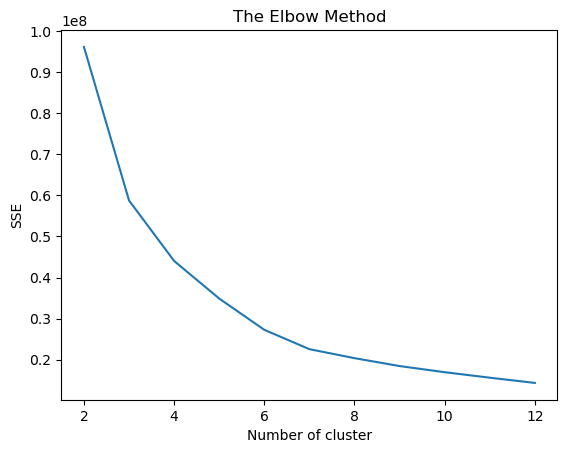

In [8]:
K=range(2,13)
sse = []

for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k).fit(X)
    sse.append(kmeans.inertia_)

plt.plot(K, sse)
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title('The Elbow Method')
plt.show()


It's hard to see an elbow here. Probably it is in k=4 but it doesn't look reasonable.

#### Silhouette coefficient

In [9]:
for k in range(2, 13):
    labels = cluster.KMeans(n_clusters=k, random_state=0).fit(X).labels_
    print ("k=" + str(k) + ", Silhouette score = " +
           str(metrics.silhouette_score(X, labels, metric="euclidean", sample_size=1000, random_state=0)))

k=2, Silhouette score = 0.6511876451571493
k=3, Silhouette score = 0.6925730522630654
k=4, Silhouette score = 0.524435640453167
k=5, Silhouette score = 0.5302764494649256
k=6, Silhouette score = 0.48523772681966304
k=7, Silhouette score = 0.46832413686934976
k=8, Silhouette score = 0.4367959876369332
k=9, Silhouette score = 0.41893588082236194
k=10, Silhouette score = 0.4079060736642499
k=11, Silhouette score = 0.37205765078596315
k=12, Silhouette score = 0.3727607600394653


We've calculated a Silhouette coefficient and we can see that highest value is for 3 clusters, and it looks reasonable.

###  Task 3
#### Use the DBSCAN method to cluster the phi and psi angle combinations in the data file.
#### i) Motivate the choice of the minimum number of samples in the neighbourhood for a point to be considered as a core point

The minimum number of samples is directly related to the density. In fact DB stands for Density Based ,  we should  have a relatively big min. of samples in order to suppress noise and group our clusters. We can start by putting an interval of min_samples from 5 to 250

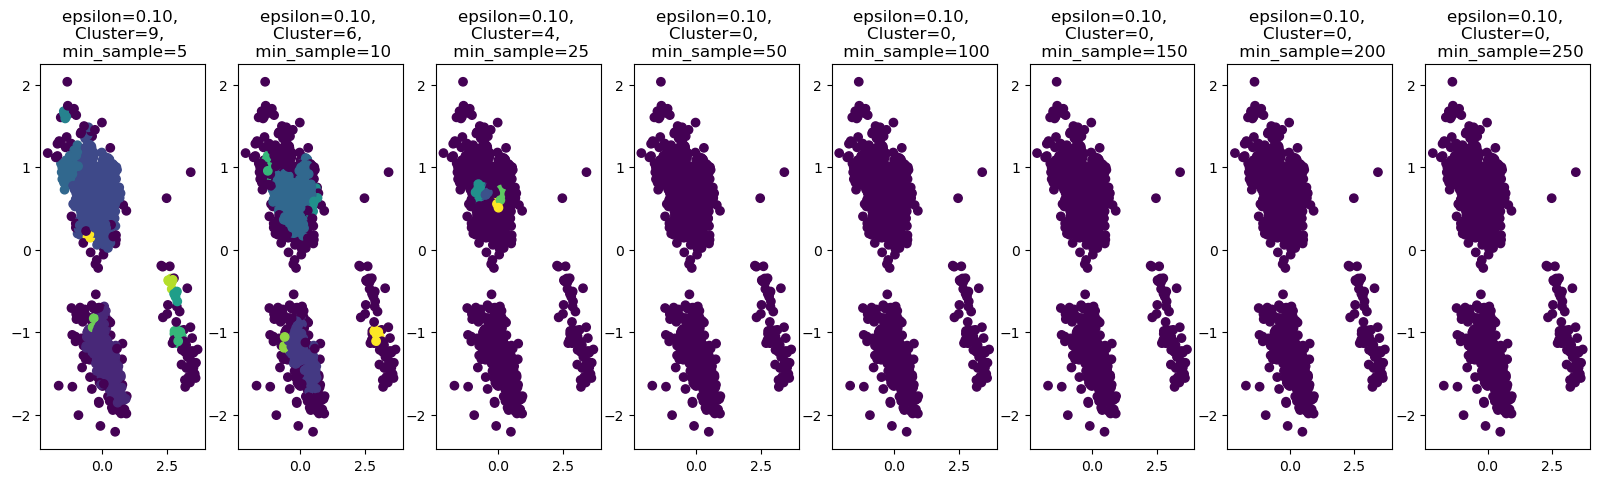

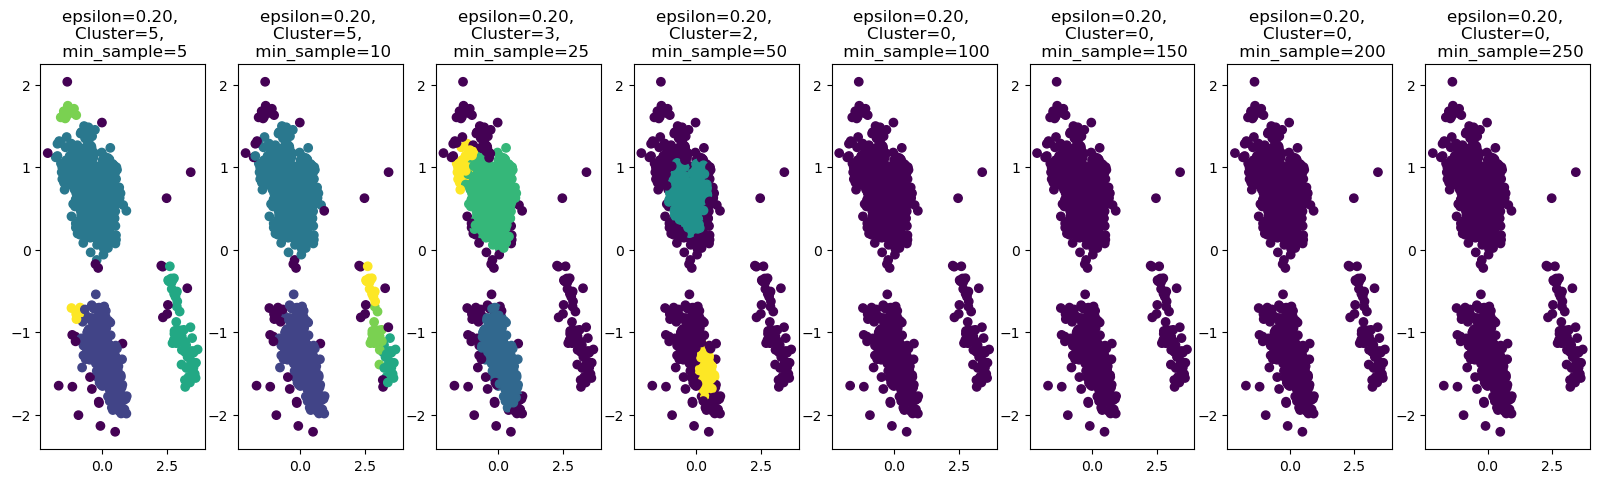

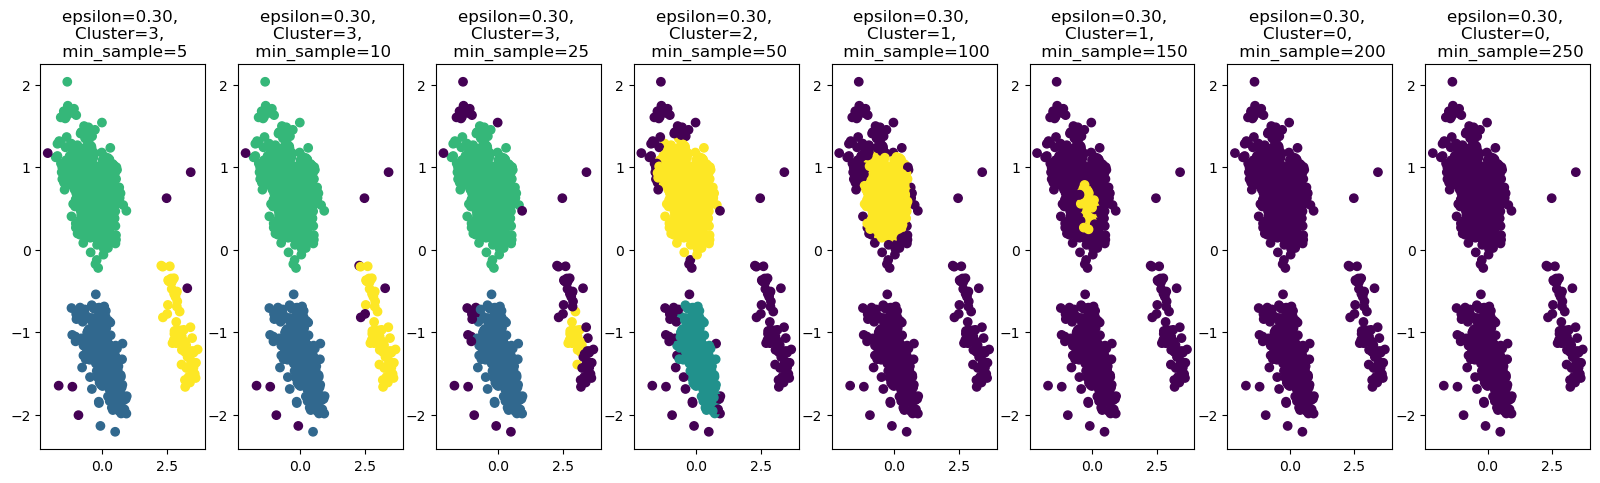

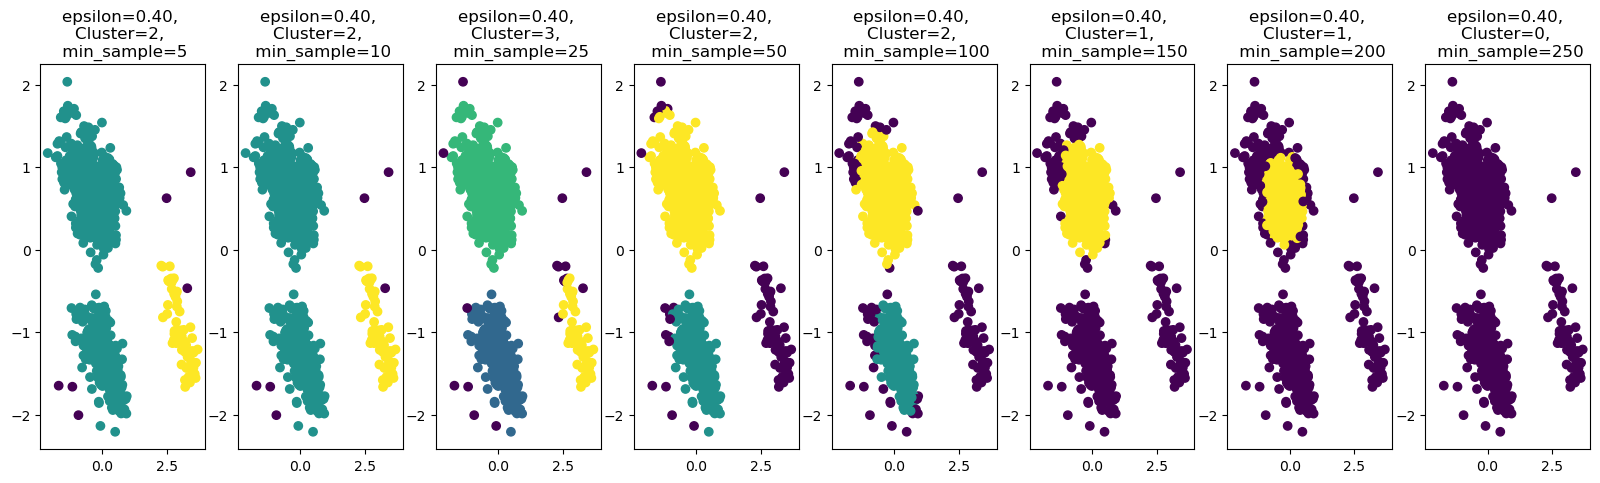

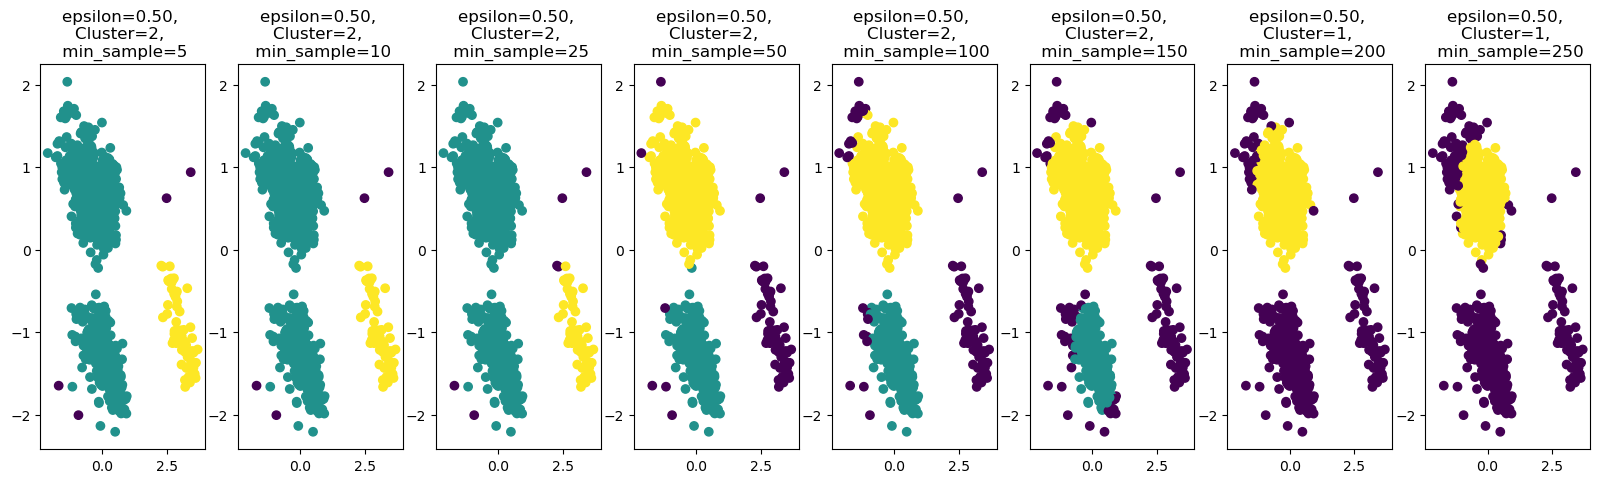

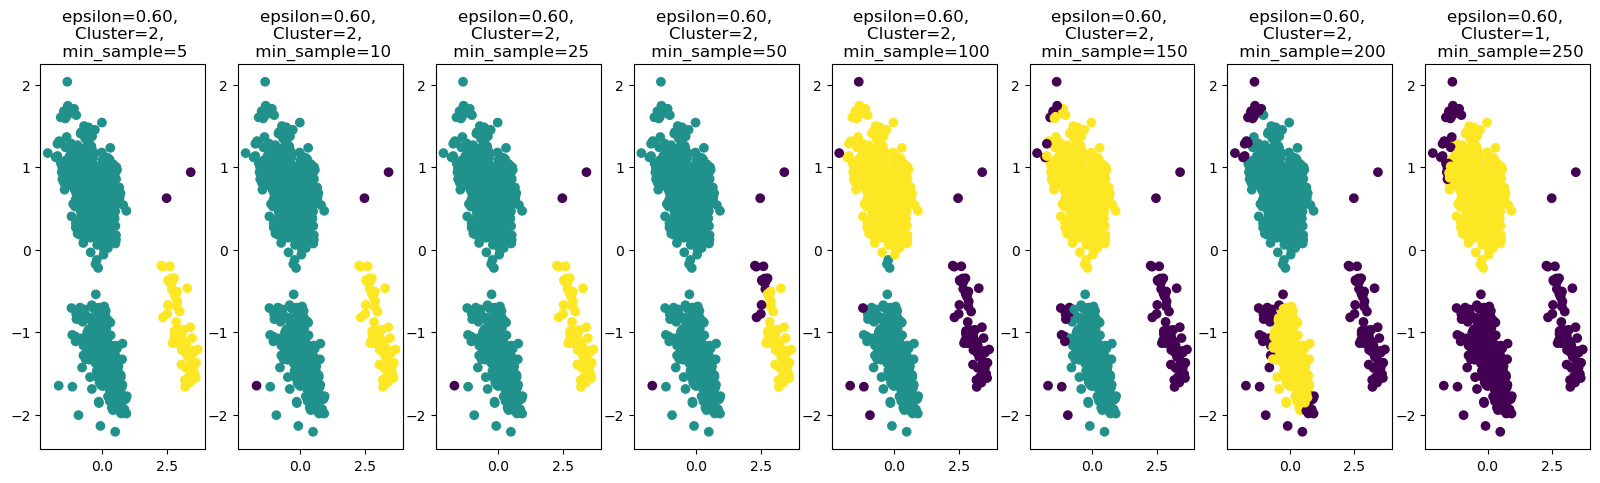

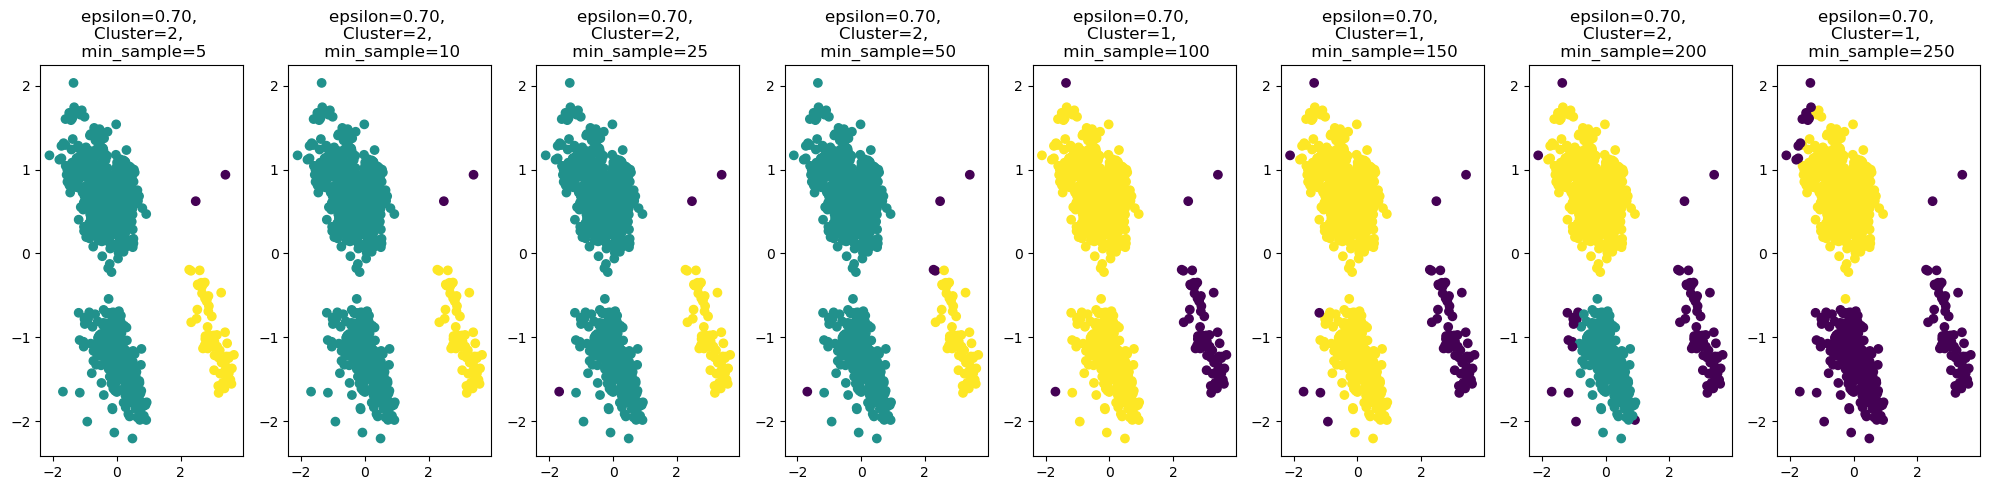

In [139]:
X = df[['phi', 'psi']]


# Choosing sample and eps values
min_samples  = [5,10,25,50,100,150,200,250]
eps  = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]

#length of eps and minimum samples
length_samples = len(min_samples)
length_eps = len(eps)
n_samples = 1000


if n_samples!=len(df):
  X, y = make_blobs(n_samples=n_samples, centers=df[['phi','psi']])        
else:
  X = df[['phi', 'psi']]
X = StandardScaler().fit_transform(X)


                                                     
#Creates scatterplots with different eps and min_samples values
for i in range(0, length_eps):
    fig, ax = plt.subplots(1, length_samples, figsize=(20,5))
    for j in range (0, length_samples):
        
        # Compute DBSCAN with the different values
        db = DBSCAN(eps=eps[i], min_samples=min_samples[j]).fit(X)
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        

        y_pred = db.fit_predict(X)

        ax[j].scatter(X[:,0], X[:,1],c=y_pred, cmap=CMAP)
        ax[j].set_title('epsilon=%.2f, \nCluster=%d, \n min_sample=%d' %(eps[i], n_clusters_, min_samples[j]))

X, _ = make_blobs(n_samples=n_samples, centers=X)

plt.tight_layout()
plt.show()


Here we observed that the number of clusters is minimum for larger min_samples values  which will result in fewer core points that is best for analysis and can yield better precise outputs. we found a suitable threshold through trial and error. One thing to look out for is setting the threshold to low as this allows for more outliers to be clustered, which is something we want to avoid. Also , it is important to balance the need for meaningful clusters with the risk of overfitting or underfitting the data.After trial and error, we've come to the conclusion that the minimum should lie somewhere between 150 and 200.

#### ii) Motivate the choice of the maximum distance between two samples belonging to the same neighbourhood (“eps” or “epsilon”).

Here we tried to find the optimum epsilon value by calculating the distance to the nearest n points for each point, sorting and plotting the results. Then we look to see where the change is most prominent and select that as epsilon.

Text(0.5, 0, 'distance to nearest n points')

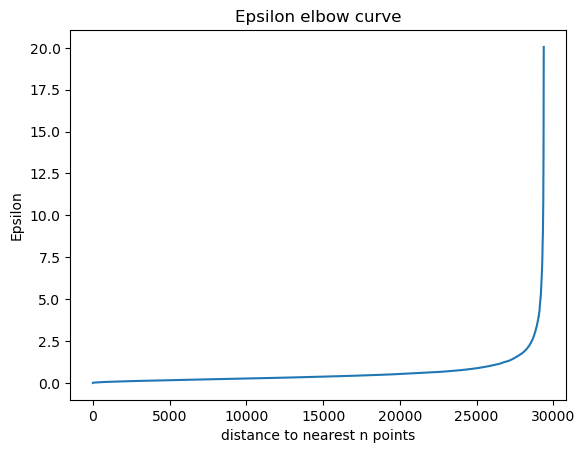

In [110]:
X = df[['phi', 'psi']]
nearest_neighbours = NearestNeighbors(n_neighbors=2).fit(X)
distances, _ = nearest_neighbours.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('Epsilon elbow curve')
plt.ylabel('Epsilon')
plt.xlabel('distance to nearest n points')

Looking at this curve the best fitting epsilon should lie somewhere between 25000 and 30000 on the bottom axis.

In [111]:
for i in range(25000,30000,1000):
  print(f'distance to nearest n points: {i}\nepsilon: {distances[i]}')

distance to nearest n points: 25000
epsilon: 0.8785587235023198
distance to nearest n points: 26000
epsilon: 1.0403608175022787
distance to nearest n points: 27000
epsilon: 1.2933946037513042
distance to nearest n points: 28000
epsilon: 1.8011889938518384
distance to nearest n points: 29000
epsilon: 3.798720756297838


Based on the given data, we can see that the epsilon value increases as the distance to the nearest n points increases. This indicates that the density of points in the dataset is decreasing. As the distance between points increases, the clustering algorithm would likely form smaller clusters or treat each point as a noise point.However ,the optimal value of epsilon is  chosen  as eps = 0.5 based on the knee point or the point of maximum curvature in the epsilon curve.

#### b) Plot the clusters found using DBSCAN and any outliers in a scatter plot.

number of clusters: 3


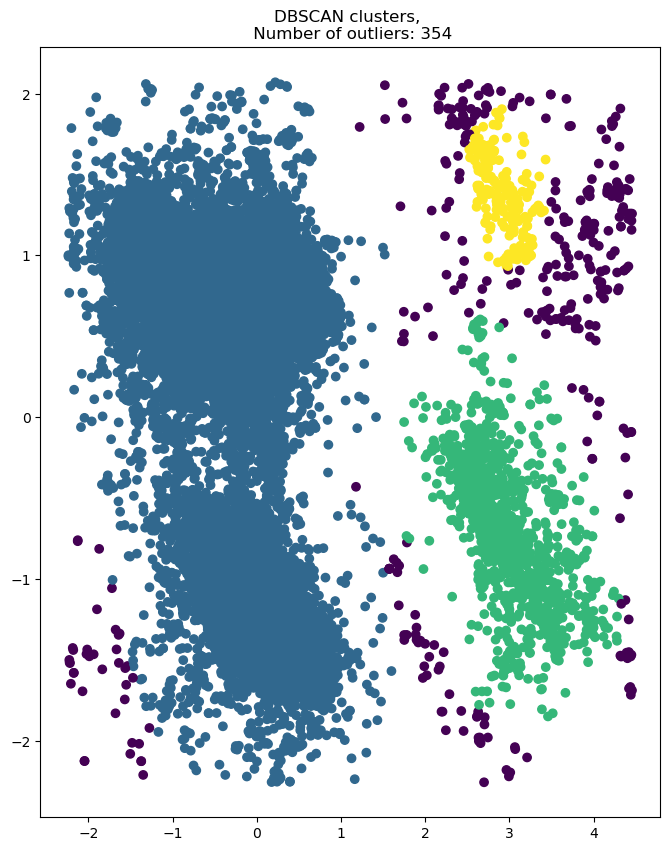

In [125]:
X = df[['phi', 'psi']]
X = StandardScaler().fit_transform(X)
eps = 0.5
min_sample_threshold = 200
fig, (ax1) = plt.subplots(1, 1, figsize=(8,10))

# generate DBSAN clustering
model_dbscan = DBSCAN(eps=eps, min_samples=min_sample_threshold).fit(X)
labels = model_dbscan.labels_
number_of_outliers = list(labels).count(-1) # outliers are given the label -1.
y_pred = model_dbscan.fit_predict(X)

# create 
ax1.scatter(X[:,0], X[:,1],c=y_pred, cmap=CMAP)
ax1.set_title(f'DBSCAN clusters, \n Number of outliers: {number_of_outliers}')

 # Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("number of clusters:", n_clusters_ )




#### c)How many outliers are found? Plot a bar chart to show how often each of the different amino acid residue types are outliers.

In [135]:
print("number of outliers:",number_of_outliers)

number of outliers: 60


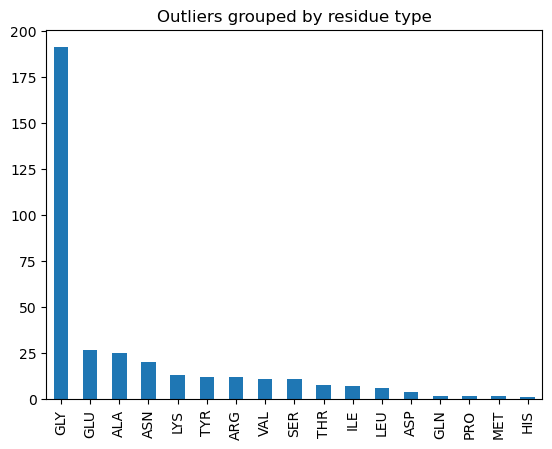

In [114]:
# Creating a new column with labels of being in a neighborhood or noise
df['labels'] = list(labels)

#filter and keep only the noise elements
df_outliers = df[(df['labels'] == -1)]
bar = df_outliers['residue name'].value_counts(sort=True).plot.bar()
plt.title('Outliers grouped by residue type')
plt.show()

#### d) Compare the clusters found by DBSCAN with those found using K-means.What are the pros and cons comparing DBSCAN and K-means for clustering

DBSCAN and K-means are fundamentally different algorithms that work in different ways, so the clusters found by each algorithm may be different. DBSCAN is a density-based algorithm that groups together points that are close to each other and have a high density of neighboring points. In contrast, K-means is a centroid-based algorithm that partitions the data into k clusters based on the similarity of points to a centroid.DBSCAN can handle arbitrary shapes of clusters and can identify noise points, whereas K-means assumes spherical clusters and cannot identify noise points. This means that DBSCAN may be better suited for datasets with irregular shapes or noise, while K-means may be better suited for datasets with well-separated spherical clusters.DBSCAN requires  tuning of the hyperparameters for bprecise and better results. So , comparituvely DBSCAN method is more accurate than Kmeans clustering. 

### Task 4

#### The data file can be stratified by amino acid residue type. Use DBSCAN to cluster the data that have residue type PRO. Investigate how the clusters found for amino acid residues of type PRO differ from the general clusters (i.e., the clusters that you get from DBSCAN with mixed residue types in question 3). What do you observe? Can you draw any conclusion with respect to question 3d? Note: The parameters might have to be adjusted from those used in question 3.


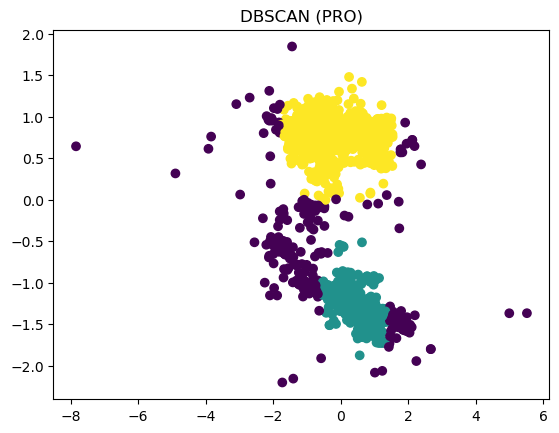

In [138]:
# generate DBSAN clustering
model_dbscan = DBSCAN(eps=0.5, min_samples=200).fit(X)
labels = model_dbscan.labels_
number_of_outliers = list(labels).count(-1) # outliers are given the label -1.
y_pred = model_dbscan.fit_predict(X)

# filter data that has residue type as PRO only
df_PRO = df[(df['residue name'] == 'PRO')]
X = df_PRO[['phi', 'psi']]
X = StandardScaler().fit_transform(X)

# create the plot
c = y_pred[:len(X)]

plt.scatter(X[:,0], X[:,1],c=c, cmap=CMAP)
plt.title("DBSCAN (PRO)")
plt.show()


when we comapre the clusters formed while filtering out PRO residue with the clusters that we obtained with mixed residue types , it is less evenly spread across and have grouped the data points into 2 clusters.clusters are evenly spread across the  DBSCAN scatter plot of mixed residue types. while hyperparameters of DBSCAN(mixed residue) is adjusted inorder to form the optimum values for the clustering and those optimised values are used here to form scatter plot for PRO residue.